In [1]:
import pandas as pd
import matplotlib.pyplot as mpt
from sklearn.linear_model import LinearRegression as SLR
from sklearn.model_selection import train_test_split as datasplit
import seaborn as sb

C:\Users\Sahil\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Sahil\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True,

In [3]:
import numpy as np

In [2]:
RawData=pd.read_csv("C:\\Users\\Sahil\\Downloads\\archive (3)\\Real estate.csv")
print("Data is read")
RawData

Data is read


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype


def GetInsights():
    NumCol=[]
    StrCol=[]
    NanCol={}
    
    for Col in RawData.columns:#Filters out numeric and non-numeric columns
        if is_numeric_dtype(RawData[Col]):
            NumCol.append(Col)
        else:
            StrCol.append(Col)    
    print("Total Number of Columns >> {}".format(len(RawData.columns)))
    print("Number of Numeric Columns >> {}".format(len(NumCol)))
    print("Numeric Columns >> ",NumCol,"\n\n")
    print("Number of Non-numeric Columns >> {}".format(len(StrCol)))
    print("Non-Numeric Columns >> ",StrCol,"\n\n")
    
   
    for col in NumCol[:-1]:#Checks for Nan
         NanCol[col]= RawData[col].isnull().sum()
    if sum(NanCol.values())>0:
        print("Training Data has Nan/empty values!!\n Needs Data PreProcessing!! ")

        for i,j in NanCol.items():
            print("{} has >> {} << Nan Values".format(i,j) )
            exit()
    else:
        print("No Nan/empty values in Training Data !! \n ")
        MaxInData(NumCol)
    
    #Modelling
    X=RawData[NumCol[:-1]]
    y=RawData[NumCol[-1]]


    train_X,Val_X,train_y,Val_y=datasplit(X,y,random_state=1)
    
    Model=SLR()
    Model.fit(train_X,train_y)
    
    #Evaluating
    evaluate_1=Model.score(train_X,train_y) *100
    print("R square of Training Data is {}% ".format(round(evaluate_1,3)))
    r1="{}% ".format(round(evaluate_1,3))
    Predict=Model.predict(Val_X)
    evaluate_2=Model.score(Val_X,Val_y) *100
    r2="{}% ".format(round(evaluate_2,3))
    print("R square of Testing Data is {}% :".format(round(evaluate_2,3)))
    PredData=pd.DataFrame(data=[["Training Data",r1],["Testing Data",r2]],columns=["Data","R square value"])
    
    
    #Pre-processing for plotting
    
    Val_y=sorted(Val_y)
    Predict=[round(i,3) for i in Predict]
    Predict=sorted(Predict)
    
    
    #DataFrame to Image
    import dataframe_image as dfi#to convert DF into image
    d1=d2=d3=dfi
    d1.export(RawData.head(10),'RawDataframe.png')
    d2.export(PredData.head(),'PredDataframe.png')

    
    
    
    #Sorting Every numeric Column
    for i in NumCol[:-1]:
        Val_X[i]=sorted(Val_X[i])
        
    #Plotting Graphs with graph to image conversion
    picList=[]
    t=str(NumCol[-1])
    i=1
    print("Matplotlib Graphical Insights >> \n")
    for col in NumCol[:-1]:
        pname="{}m.png".format(str(i))
        mpt.plot(Val_X[col],Val_y, label="Actual Price")
        mpt.plot(Val_X[col],Predict, label="Predicted Price")
        mpt.title("{} V/s {}".format(col,t))
        mpt.xlabel(str(col))
        mpt.ylabel(t)
        mpt.legend()
        mpt.savefig(str(pname))
        picList.append(pname)
        i+=1
        mpt.show() 
    
    
    print("Seaborn Graphical Insights >> \n")#Plotting using Seaborn
    for col in NumCol[:-1]:
        pname="{}sb.png".format(str(i))
        sb.regplot(x=str(col), y=t, data=RawData,x_jitter=.05)
        mpt.savefig(str(pname))
        mpt.show()
        i+=1
        picList.append(pname)
        
        
    picList.append('RawDataframe.png')  
    picList.append('PredDataframe.png')
    
        
        
    return picList
def MaxInData(NumCol):
    print("Training data insight>> Feature-->max >> min\n")
    i=1
    for col in NumCol[:-1]:
        print("{}].{}--->max value >> {} ; min Value >> {}".format(i,col,max(RawData[col]),min(RawData[col])))
        i+=1
    print("\nTarget data insight >> ")
    Target=NumCol[-1]
    print("{}--->max value >> {} ; min Value >> {}\n\n".format(Target,max(RawData[Target]),min(RawData[Target])))
   
        


Total Number of Columns >> 8
Number of Numeric Columns >> 8
Numeric Columns >>  ['No', 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude', 'Y house price of unit area'] 


Number of Non-numeric Columns >> 0
Non-Numeric Columns >>  [] 


No Nan/empty values in Training Data !! 
 
Training data insight>> Feature-->max >> min

1].No--->max value >> 414 ; min Value >> 1
2].X1 transaction date--->max value >> 2013.5829999999999 ; min Value >> 2012.6670000000001
3].X2 house age--->max value >> 43.8 ; min Value >> 0.0
4].X3 distance to the nearest MRT station--->max value >> 6488.021 ; min Value >> 23.382839999999998
5].X4 number of convenience stores--->max value >> 10 ; min Value >> 0
6].X5 latitude--->max value >> 25.01459 ; min Value >> 24.93207
7].X6 longitude--->max value >> 121.56626999999999 ; min Value >> 121.47353000000001

Target data insight >> 
Y house price of unit area--->max value >>

C:\Users\Sahil\Anaconda3\lib\site-packages\ipykernel_launcher.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


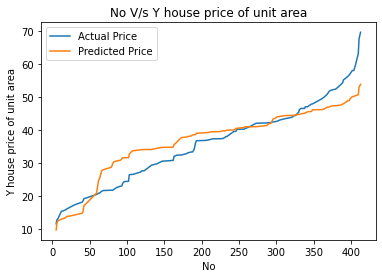

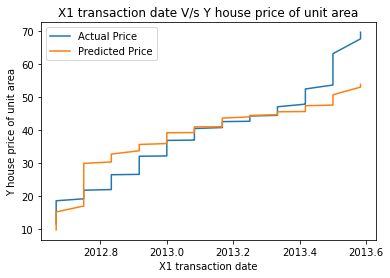

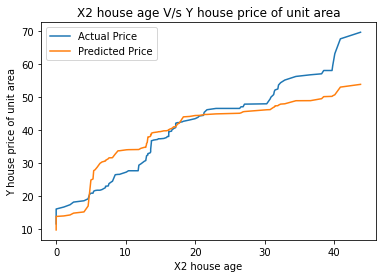

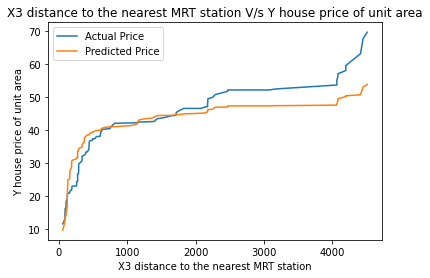

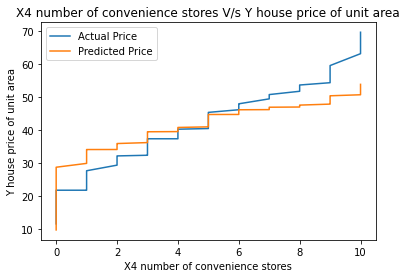

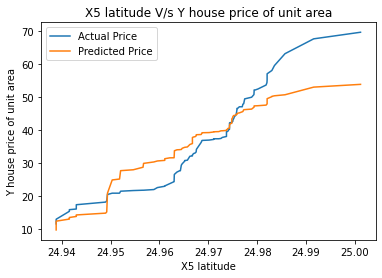

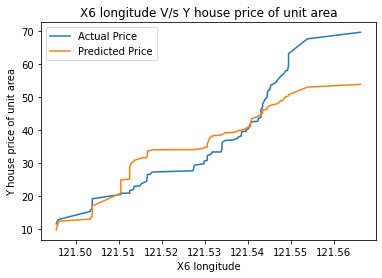

Seaborn Graphical Insights >> 



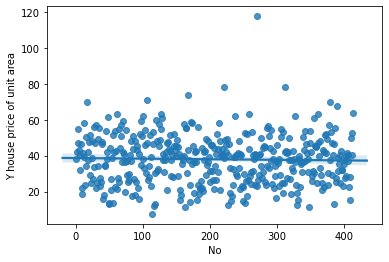

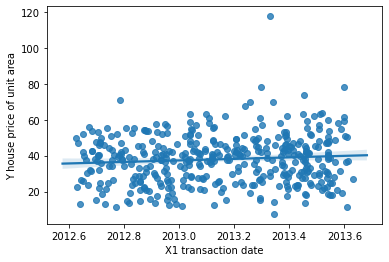

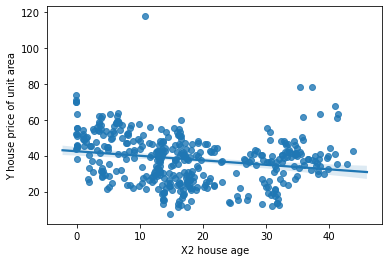

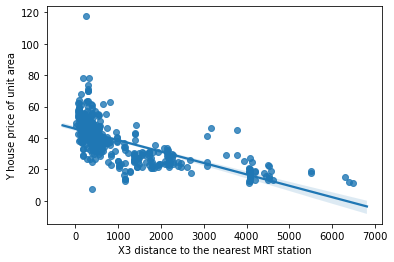

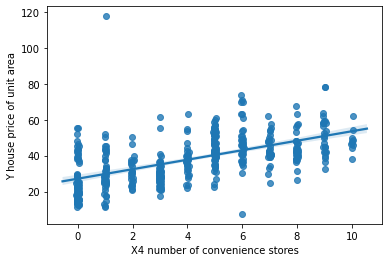

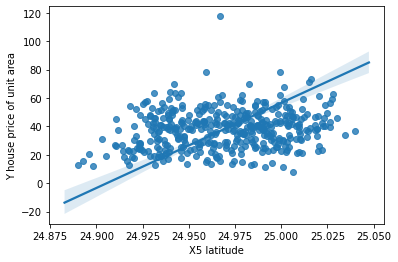

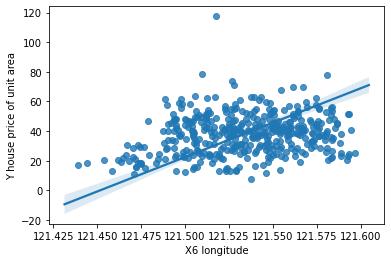

In [5]:
def GenQuickRepo():
    P=GetInsights()
    
GenQuickRepo()

In [21]:
#pip install fpdf
#pip install pdf2image
pip install img2pdf

SyntaxError: invalid syntax (<ipython-input-21-3cdfdec28286>, line 3)

In [30]:
pip install PyMuPDF


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Sahil\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
https://www.tutorialexample.com/a-simple-guide-to-python-convert-image-to-pdf-without-removing-image-alpha-channel/

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Sahil\Anaconda3\python.exe -m pip install --upgrade pip' command.
